# E. coli metabolic network

### Building graph

In [1]:
import modelo as m
import networkx as nx
import Bio.KEGG.REST as rkg
import Bio.KEGG.Enzyme as ex

eco = m.get_network("eco", opt='eco')
eco_nodes = list(eco.grafo.nodes())
eco_nodes.remove('undefined')
orf_queries = []

for i in range(len(eco_nodes)):
    gene = rkg.kegg_get(eco_nodes[i])
    tmp = ex.read(gene)
    if eco_nodes[i].startswith("eco:"):
        orf_queries.append(tmp.name[0])

Retrieving data from KEGG PATHWAY database. Sat May 12 11:59:20 2018
Building graphs.


### Building a gene dataset from The Profiling of Escherichia coli Chromosome (PEC) database

In [2]:
import pandas as pd

eco_data = pd.read_table('PECData.dat')
eco_data.rename(columns={'Class(1:essential 2:noessential 3:unknown)': 'Class',
                         'Alternative name': 'AltName'}, inplace=True)
eco_data = eco_data[['Orf','AltName','Class','Product']]
eco_data['AltName'] = eco_data['AltName'].apply(lambda x: x.split(','))
eco_data = eco_data.drop_duplicates(subset='Orf', keep='first')
eco_data.tail()

,Orf,AltName,Class,Product
4492,creC,"[b4399, ECK4391, JW4362, o474, phoM]",2,sensory histidine kinase in two-component regu...
4493,creD,"[b4400, cet, ECK4392, JW4363, refII]",2,inner membrane protein
4494,arcA,"[b4401, cpxC, dye, ECK4393, fexA, JW4364, msp,...",2,DNA-binding response regulator in two-componen...
4495,yjjY,"[b4402, ECK4394, JW4365, o46]",2,hypothetical protein
4496,yjtD,"[b4403, ECK4395, JW4366, lasT, o228b]",2,putative methyltransferase


### Amount of hits in database by graph node

In [3]:
eco_hits = {}
for orf in orf_queries:
    if orf in list(eco_data['Orf']):
        eco_hits[orf] = 1
    elif any(orf in x for x in list(eco_data['AltName'])):
        eco_hits[orf] = 1
    else:
        eco_hits[orf] = 0
eco_hits.values()

dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

### Essential node ratio of cleaned graph

In [4]:
eco_hits = {k:v for k,v in eco_hits.items() if v != 0}
essentials = eco_data[eco_data['Class'] == 1]
for k in eco_hits:
    if isinstance(k, str) and k in list(essentials['Orf']):
        eco_hits[k] = (eco_hits[k], 1)
    else:
        eco_hits[k] = (eco_hits[k], 2)
len({k for k in eco_hits if eco_hits[k][1] == 1}) / len(eco_hits)

0.13157894736842105

### Exporting gathered data

In [5]:
f = open('EcoliNetData.dat', 'w')
f.write("Feature/Product" + "\t" + "Frequency on Database" + "\t" + "Class(1:essential 2:noessential)" + "\n")
for k in eco_hits:
    f.write(str(k) + "\t" + str(eco_hits[k][0]) + "\t" + str(eco_hits[k][1]) + "\n")
f.close()

### Associating node info with essentiality

In [6]:
essential = []
nonessential = []
unknown = []

for i in range(len(eco_nodes)):
    gene = rkg.kegg_get(eco_nodes[i])
    tmp = ex.read(gene)
    if eco_nodes[i].startswith("eco:"):
        if tmp.name[0] in eco_hits:
            if eco_hits[tmp.name[0]][1] == 1:
                essential.append(eco_nodes[i])
            else:
                nonessential.append(eco_nodes[i])
        else:
            unknown.append(eco_nodes[i])

### Graph visualization

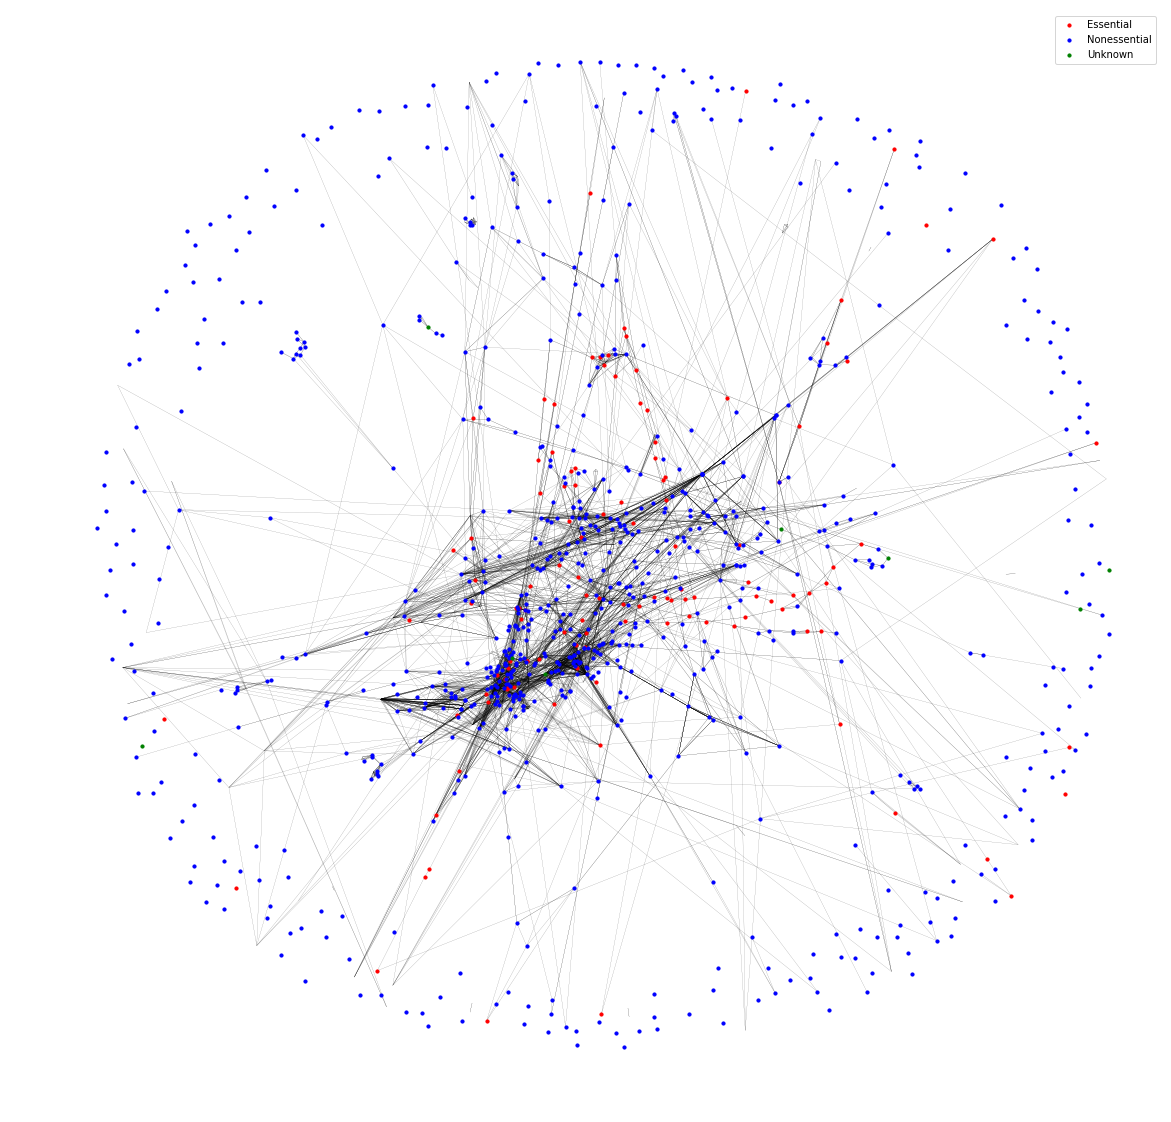

In [7]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(eco.grafo)
plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(eco.grafo, pos, nodelist=essential, node_color='r', node_size=10, alpha=1.0, label='Essential')
nx.draw_networkx_nodes(eco.grafo, pos, nodelist=nonessential, node_color='b', node_size=10, alpha=1.0, label='Nonessential')
nx.draw_networkx_nodes(eco.grafo, pos, nodelist=unknown, node_color='g', node_size=10, alpha=1.0, label='Unknown')
nx.draw_networkx_edges(eco.grafo, pos, width=0.1, alpha=1.0, arrows=False)
plt.axis('off')
plt.legend(['Essential', 'Nonessential', 'Unknown'])
plt.savefig('EcoliMN.png')
plt.show()

### Graph visualization without isolates

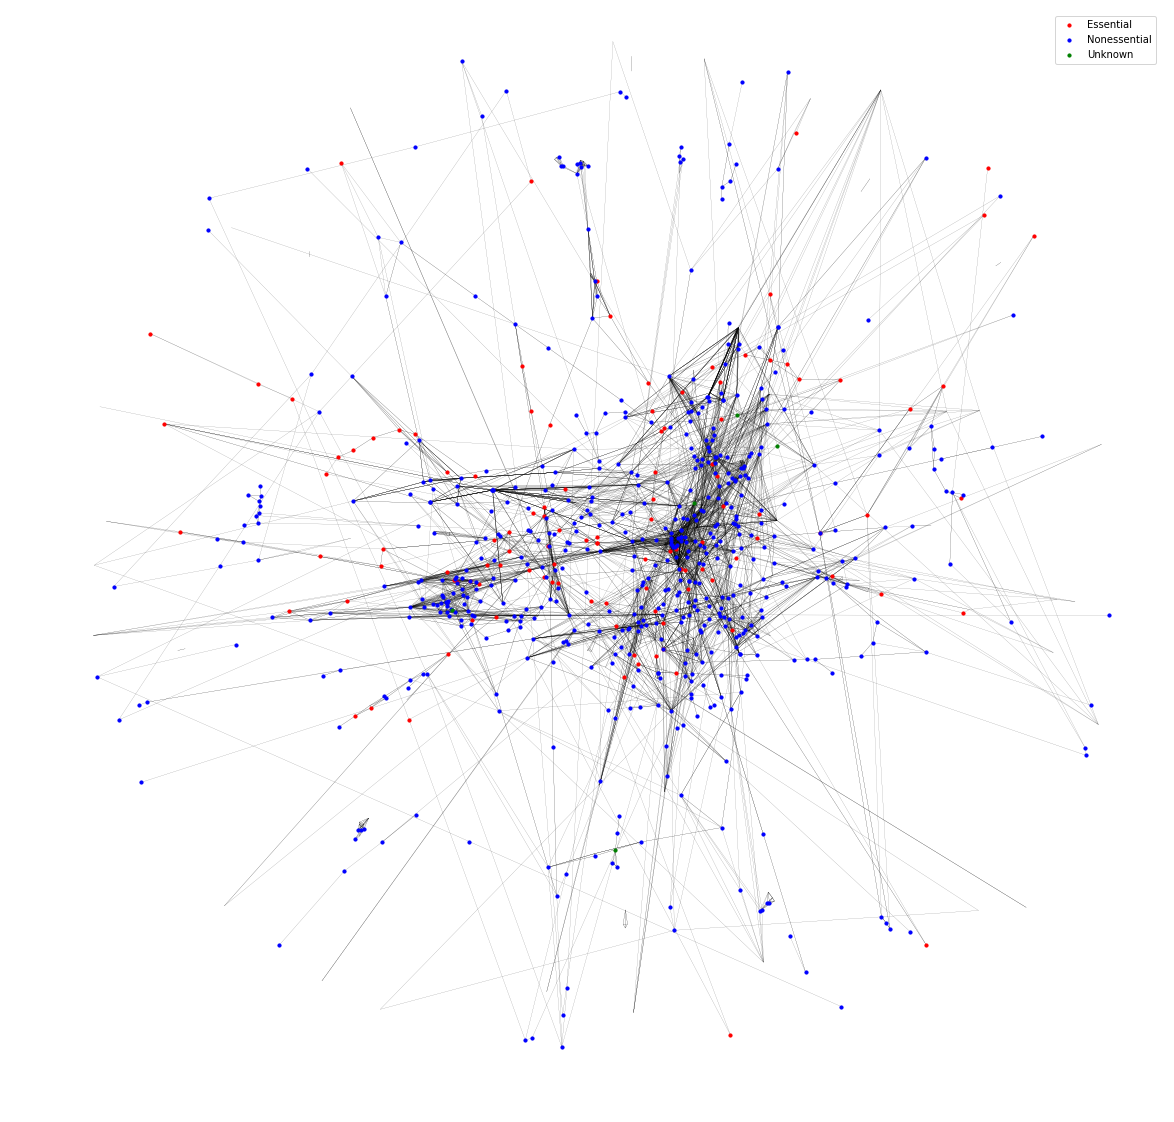

In [8]:
teste = eco.grafo.copy()
essential = [n for n in essential if n not in list(nx.isolates(teste))]
nonessential = [n for n in nonessential if n not in list(nx.isolates(teste))]
unknown = [n for n in unknown if n not in list(nx.isolates(teste))]
teste.remove_nodes_from(list(nx.isolates(teste)))

pos = nx.spring_layout(teste)
plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(teste, pos, nodelist=essential, node_color='r', node_size=10, alpha=1.0, label='Essential')
nx.draw_networkx_nodes(teste, pos, nodelist=nonessential, node_color='b', node_size=10, alpha=1.0, label='Nonessential')
nx.draw_networkx_nodes(teste, pos, nodelist=unknown, node_color='g', node_size=10, alpha=1.0, label='Unknown')
nx.draw_networkx_edges(teste, pos, width=0.1, alpha=1.0, arrows=False)
plt.axis('off')
plt.legend(['Essential', 'Nonessential', 'Unknown'])
plt.savefig('EcoliCleanedMN.png')
plt.show()

### Final node frequency

In [9]:
print('Essential nodes:', len(essential))
print('Nonessential nodes:', len(nonessential))
print('Unknown nodes:', len(unknown))
print('Total nodes:', len(essential + nonessential + unknown))

Essential nodes: 115
Nonessential nodes: 573
Unknown nodes: 5
Total nodes: 693


# M. genitalium metabolic network

### Building graph

In [10]:
mge = m.get_network("mge", opt='mge')
mge_nodes = list(mge.grafo.nodes())
mge_nodes.remove('undefined')
orf_queries = []

for i in range(len(mge_nodes)):
    gene = rkg.kegg_get(mge_nodes[i])
    tmp = ex.read(gene)
    if mge_nodes[i].startswith("mge:") and tmp.name != []:
        orf_queries.append(tmp.name[0])

Retrieving data from KEGG PATHWAY database. Sat May 12 12:32:40 2018
Building graphs.


### Building a gene dataset from the Database of Essential Genes (DEG)

In [11]:
md1 = pd.read_table('degannotation-np.dat', names=['DEG_AC', 'Gene_Name', 'Gene_Ref', 'COG', 'Class', 'Function', 'Organism',
                                                   'Refseq', 'Condition'])
md1.drop(0, inplace=True)
md1['Essential'] = 2
md2 = pd.read_table('degannotation-p.dat', names=['DEG_AC', 'Gene_Name', 'Gene_Ref', 'COG', 'Class', 'Function', 'Organism', 
                                                  'Refseq', 'Condition'])
md2.drop(0, inplace=True)
md2['Essential'] = 1
mge_data = pd.concat([md1, md2])
mge_data = mge_data[mge_data['Refseq'] == 'Mycoplasma genitalium G37']
mge_data = mge_data[['Gene_Ref','Organism','Essential']]
mge_data['Gene_Ref'] = mge_data['Gene_Ref'].apply(lambda x: x.split('/'))
mge_data.tail()

,Gene_Ref,Organism,Essential
2371,[MG_467],"ABC transporter, ATP-binding protein",1
2372,[MG_468],"ABC transporter, permease protein",1
2373,"[MG468.1, MG_526]","ABC transporter, ATP-binding protein",1
2374,[dnaA],chromosomal replication initiator protein DnaA,1
2375,[soj],CobQ/CobB/MinD/ParA nucleotide binding domain,1


### Associating graph and DEG dataset information

In [12]:
mge_hits = {}
for index, row in mge_data.iterrows():
    if any(x in row['Gene_Ref'] for x in orf_queries):
        mge_hits[row['Gene_Ref'][0]] = 1
        continue
mge_hits.values()

dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Essential node ratio of cleaned graph

In [13]:
mge_hits = {k:v for k,v in mge_hits.items() if v != 0}
essentials = mge_data[mge_data['Essential'] == 1]
for k in mge_hits:
    if isinstance(k, str) and any(k in x for x in list(essentials['Gene_Ref'])):
        mge_hits[k] = (mge_hits[k], 1)
    else:
        mge_hits[k] = (mge_hits[k], 2)
len({k for k in mge_hits if mge_hits[k][1] == 1}) / len(mge_hits)

0.9384615384615385

### Exporting gathered data

In [14]:
f = open('MgenitaliumNetData.dat', 'w')
f.write("Feature/Product" + "\t" + "Frequency on Database" + "\t" + "Class(1:essential 2:noessential)" + "\n")
for k in mge_hits:
    f.write(str(k) + "\t" + str(mge_hits[k][0]) + "\t" + str(mge_hits[k][1]) + "\n")
f.close()

### Associating node info with essentiality

In [15]:
essential = []
nonessential = []
unknown = []

for i in range(len(mge_nodes)):
    gene = rkg.kegg_get(mge_nodes[i])
    tmp = ex.read(gene)
    if mge_nodes[i].startswith("mge:"):
        if tmp.name != [] and tmp.name[0] in mge_hits:
            if mge_hits[tmp.name[0]][1] == 1:
                essential.append(mge_nodes[i])
            else:
                nonessential.append(mge_nodes[i])
        else:
            unknown.append(mge_nodes[i])
    elif tmp.name != []:
        unknown.append(mge_nodes[i])

### Graph visualization

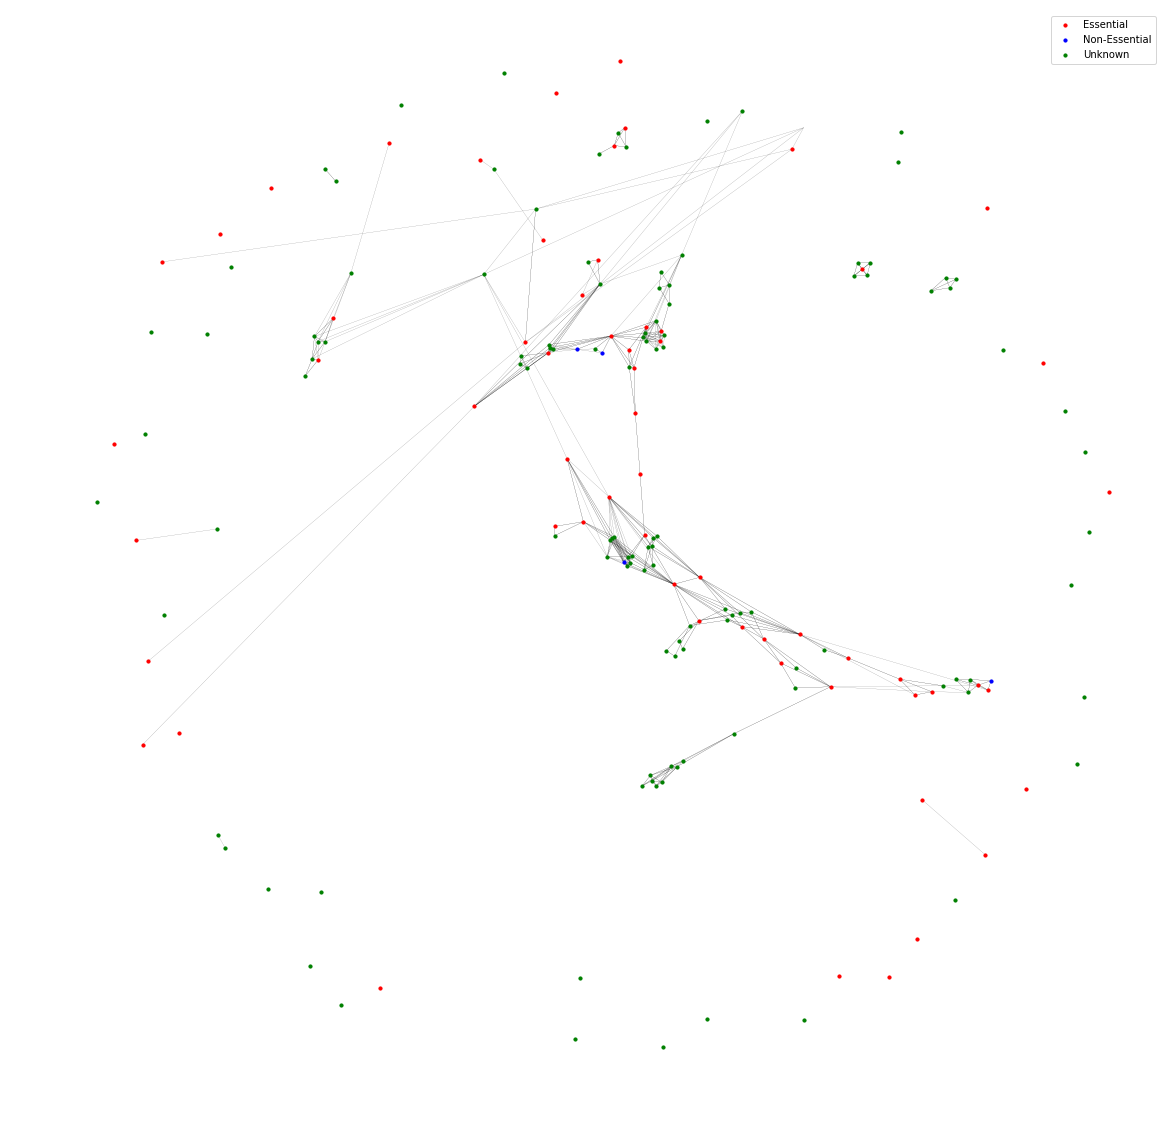

In [16]:
pos = nx.spring_layout(mge.grafo)
plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(mge.grafo, pos, nodelist=essential, node_color='r', node_size=10, alpha=1.0, label='Essential')
nx.draw_networkx_nodes(mge.grafo, pos, nodelist=nonessential, node_color='b', node_size=10, alpha=1.0, label='Nonessential')
nx.draw_networkx_nodes(mge.grafo, pos, nodelist=unknown, node_color='g', node_size=10, alpha=1.0, label='Unknown')
nx.draw_networkx_edges(mge.grafo, pos, width=0.1, alpha=1.0, arrows=False)
plt.axis('off')
plt.legend(['Essential', 'Non-Essential', 'Unknown'])
plt.savefig('MgenitaliumMN.png')
plt.show()

### Graph visualization without isolates

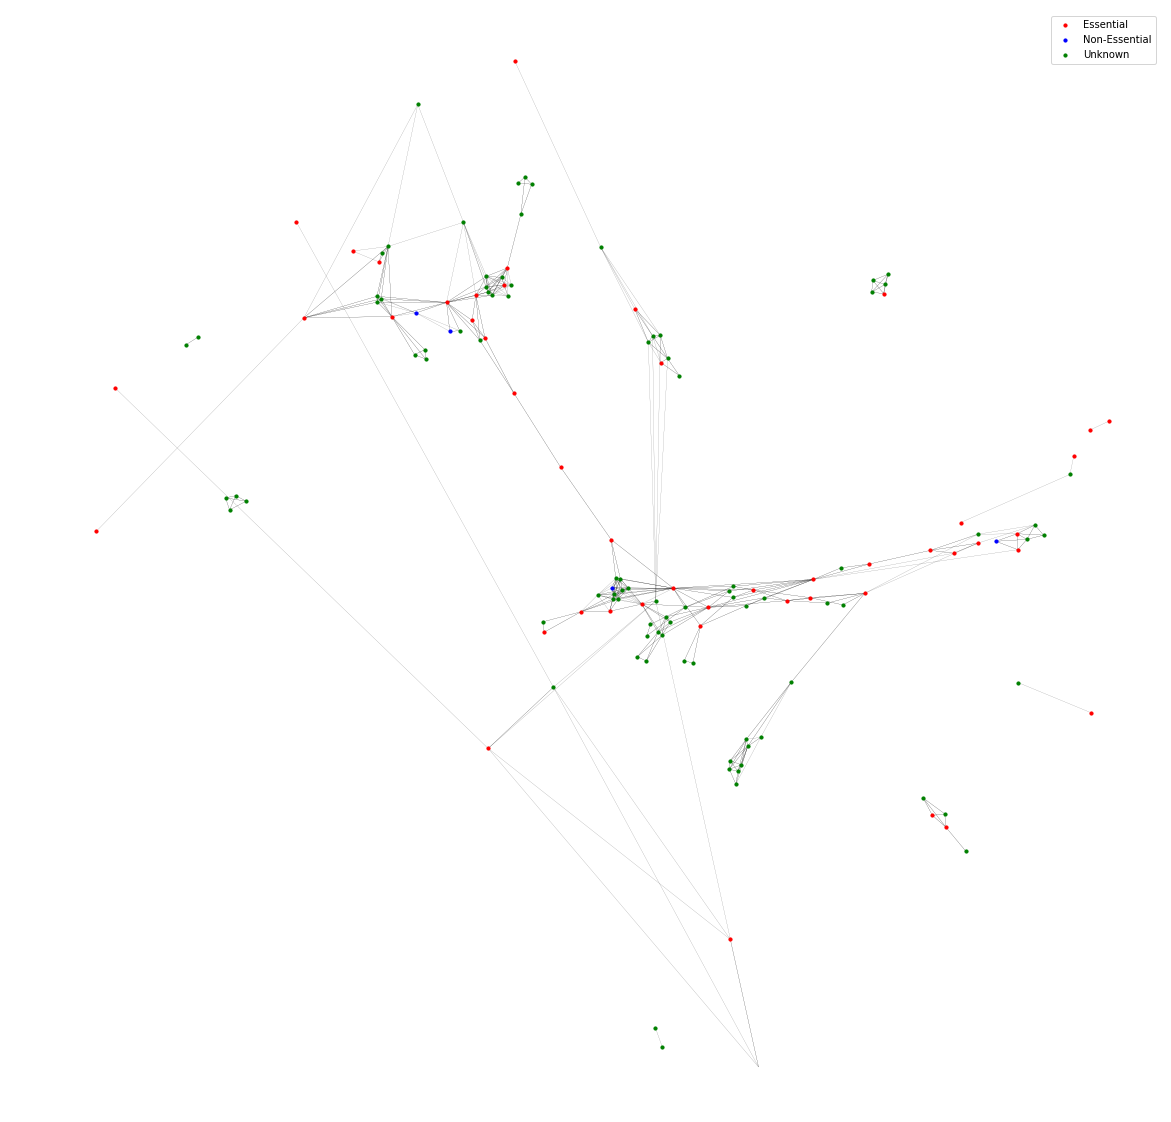

In [17]:
teste = mge.grafo.copy()
essential = [n for n in essential if n not in list(nx.isolates(teste))]
nonessential = [n for n in nonessential if n not in list(nx.isolates(teste))]
unknown = [n for n in unknown if n not in list(nx.isolates(teste))]
teste.remove_nodes_from(list(nx.isolates(teste)))

pos = nx.spring_layout(teste)
plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(teste, pos, nodelist=essential, node_color='r', node_size=10, alpha=1.0, label='Essential')
nx.draw_networkx_nodes(teste, pos, nodelist=nonessential, node_color='b', node_size=10, alpha=1.0, label='Nonessential')
nx.draw_networkx_nodes(teste, pos, nodelist=unknown, node_color='g', node_size=10, alpha=1.0, label='Unknown')
nx.draw_networkx_edges(teste, pos, width=0.1, alpha=1.0, arrows=False)
plt.axis('off')
plt.legend(['Essential', 'Non-Essential', 'Unknown'])
plt.savefig('MgenitaliumCleanedMN.png')
plt.show()

### Final node frequency

In [18]:
print('Essential nodes:', len(essential))
print('Nonessential nodes:', len(nonessential))
print('Unknown nodes:', len(unknown))
print('Total nodes:', len(essential + nonessential + unknown))

Essential nodes: 47
Nonessential nodes: 4
Unknown nodes: 89
Total nodes: 140


# P. aeruginosa metabolic network

### Building graph

In [19]:
pae = m.get_network("pae", opt='pae')
pae_nodes = list(pae.grafo.nodes())
pae_nodes.remove('undefined')
orf_queries = []

for i in range(len(pae_nodes)):
    gene = rkg.kegg_get(pae_nodes[i])
    tmp = ex.read(gene)
    if pae_nodes[i].startswith("pae:") and tmp.name != []:
        orf_queries.append(tmp.name[0])

Retrieving data from KEGG PATHWAY database. Sat May 12 12:38:58 2018
Building graphs.


### Building a gene dataset from the Database of Essential Genes (DEG)

In [20]:
md1 = pd.read_table('degannotation-np.dat', names=['DEG_AC', 'Gene_Name', 'Gene_Ref', 'COG', 'Class', 'Function', 'Organism',
                                                   'Refseq', 'Condition'])
md1.drop(0, inplace=True)
md1['Essential'] = 2
md2 = pd.read_table('degannotation-p.dat', names=['DEG_AC', 'Gene_Name', 'Gene_Ref', 'COG', 'Class', 'Function', 'Organism', 
                                                  'Refseq', 'Condition'])
md2.drop(0, inplace=True)
md2['Essential'] = 1
pae_data = pd.concat([md1, md2])
pae_data = pae_data[pae_data['Refseq'] == 'Pseudomonas aeruginosa PAO1']
pae_data = pae_data[['Gene_Ref','Organism','Essential']]
pae_data['Gene_Ref'] = pae_data['Gene_Ref'].apply(lambda x: x.split('/'))
pae_data.tail()

,Gene_Ref,Organism,Essential
13763,[atpH],ATP synthase F0F1 subunit delta,1
13764,[atpF],ATP synthase F0F1 subunit B,1
13765,[atpB],ATP synthase F0F1 subunit A,1
13766,[-],inner membrane protein translocase subunit YidC,1
13767,[rnpA],ribonuclease P,1


### Associating graph and DEG dataset information

In [21]:
pae_hits = {}
for index, row in pae_data.iterrows():
    if any(x in row['Gene_Ref'] for x in orf_queries):
        pae_hits[row['Gene_Ref'][0]] = 1
        continue
pae_hits.values()

dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

### Essential node ratio of cleaned graph

In [22]:
pae_hits = {k:v for k,v in pae_hits.items() if v != 0}
essentials = pae_data[pae_data['Essential'] == 1]
for k in pae_hits:
    if isinstance(k, str) and any(k in x for x in list(essentials['Gene_Ref'])):
        pae_hits[k] = (pae_hits[k], 1)
    else:
        pae_hits[k] = (pae_hits[k], 2)
len({k for k in pae_hits if pae_hits[k][1] == 1}) / len(pae_hits)

0.25164473684210525

### Exporting gathered data

In [23]:
f = open('PaeruginosaNetData.dat', 'w')
f.write("Feature/Product" + "\t" + "Frequency on Database" + "\t" + "Class(1:essential 2:noessential)" + "\n")
for k in pae_hits:
    f.write(str(k) + "\t" + str(pae_hits[k][0]) + "\t" + str(pae_hits[k][1]) + "\n")
f.close()

### Associating node info with essentiality

In [24]:
essential = []
nonessential = []
unknown = []

for i in range(len(pae_nodes)):
    gene = rkg.kegg_get(pae_nodes[i])
    tmp = ex.read(gene)
    if pae_nodes[i].startswith("pae:"):
        if tmp.name != [] and tmp.name[0] in pae_hits:
            if pae_hits[tmp.name[0]][1] == 1:
                essential.append(pae_nodes[i])
            else:
                nonessential.append(pae_nodes[i])
        else:
            unknown.append(pae_nodes[i])
    elif tmp.name != []:
        unknown.append(pae_nodes[i])

### Graph visualization

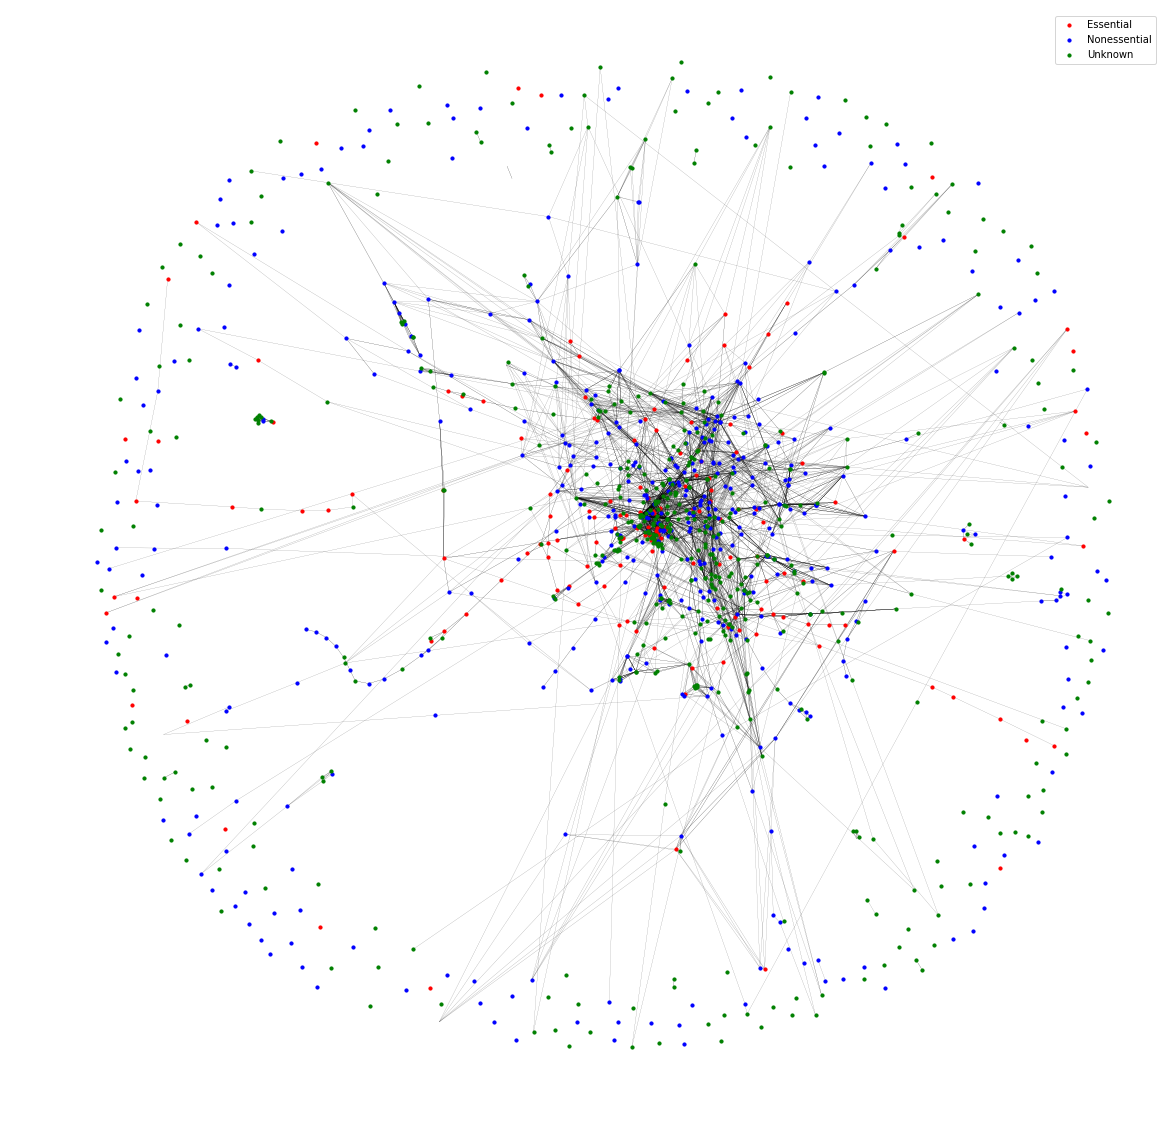

In [25]:
pos = nx.spring_layout(pae.grafo)
plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(pae.grafo, pos, nodelist=essential, node_color='r', node_size=10, alpha=1.0, label='Essential')
nx.draw_networkx_nodes(pae.grafo, pos, nodelist=nonessential, node_color='b', node_size=10, alpha=1.0, label='Nonessential')
nx.draw_networkx_nodes(pae.grafo, pos, nodelist=unknown, node_color='g', node_size=10, alpha=1.0, label='Unknown')
nx.draw_networkx_edges(pae.grafo, pos, width=0.1, alpha=1.0, arrows=False)
plt.axis('off')
plt.legend(['Essential', 'Nonessential', 'Unknown'])
plt.savefig('PaeruginosaMN.png')
plt.show()

### Graph visualization without isolates

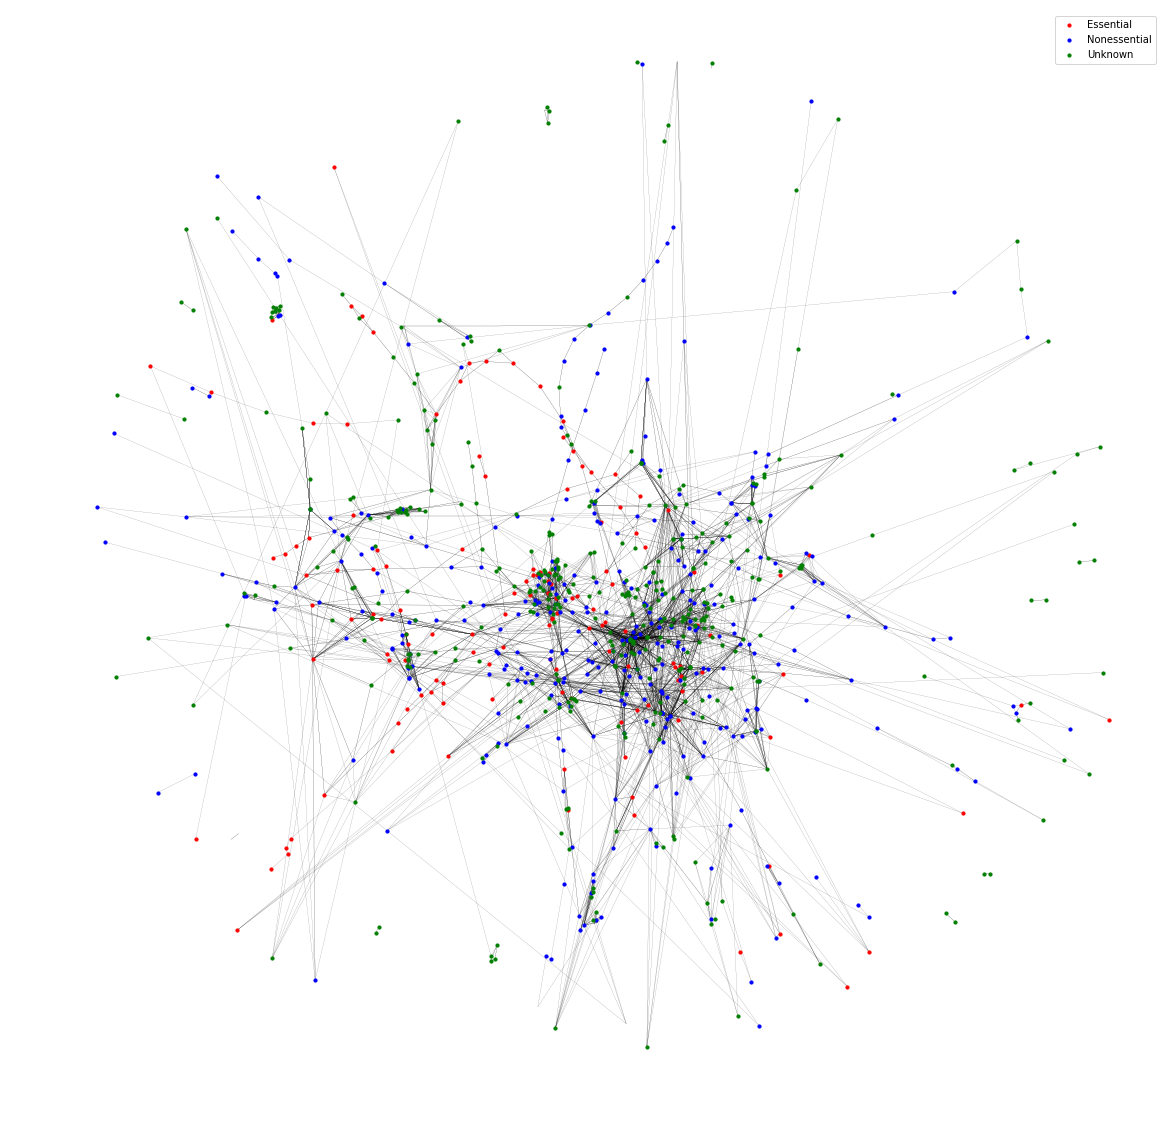

In [26]:
teste = pae.grafo.copy()
essential = [n for n in essential if n not in list(nx.isolates(teste))]
nonessential = [n for n in nonessential if n not in list(nx.isolates(teste))]
unknown = [n for n in unknown if n not in list(nx.isolates(teste))]
teste.remove_nodes_from(list(nx.isolates(teste)))

pos = nx.spring_layout(teste)
plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(teste, pos, nodelist=essential, node_color='r', node_size=10, alpha=1.0, label='Essential')
nx.draw_networkx_nodes(teste, pos, nodelist=nonessential, node_color='b', node_size=10, alpha=1.0, label='Nonessential')
nx.draw_networkx_nodes(teste, pos, nodelist=unknown, node_color='g', node_size=10, alpha=1.0, label='Unknown')
nx.draw_networkx_edges(teste, pos, width=0.1, alpha=1.0, arrows=False)
plt.axis('off')
plt.legend(['Essential', 'Nonessential', 'Unknown'])
plt.savefig('PaeruginosaCleanedMN.png')
plt.show()

### Final node frequency

In [27]:
print('Essential nodes:', len(essential))
print('Nonessential nodes:', len(nonessential))
print('Unknown nodes:', len(unknown))
print('Total nodes:', len(essential + nonessential + unknown))

Essential nodes: 137
Nonessential nodes: 341
Unknown nodes: 410
Total nodes: 888


# S. cerevisiae metabolic network

### Building graph

In [28]:
sce = m.get_network("sce", opt='sce')
sce_nodes = list(sce.grafo.nodes())
sce_nodes.remove('undefined')
orf_queries = []

for i in range(len(sce_nodes)):
    gene = rkg.kegg_get(sce_nodes[i])
    tmp = ex.read(gene)
    if sce_nodes[i].startswith("sce:"):
        orf_queries.append(sce_nodes[i].split(':')[1])

Retrieving data from KEGG PATHWAY database. Sat May 12 13:10:56 2018
Building graphs.


### Building essential gene list from Saccharomyces Genome Deletion Project database

In [29]:
sce_data = []

db = open('EssentialDB_table.txt', 'r')
for row in db.readlines()[1:]:
    sce_data.append(row.split('\t')[0])

sce_data[-5:]

['YPL243W', 'YPL251W', 'YPL252C', 'YPL255W', 'YPL266W']

### Essential node ratio of cleaned graph

In [30]:
sce_hits = {}
for orf in orf_queries:
    if orf in sce_data:
        sce_hits[orf] = 1
    else:
        sce_hits[orf] = 0
sce_hits.values()

dict_values([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [31]:
len({k for k in sce_hits if sce_hits[k] == 1}) / len(sce_hits)

0.07862407862407862

### Exporting gathered data

In [32]:
f = open('ScerevisiaeNetData.dat', 'w')
f.write("Feature/Product" + "\t" + "Class(1:essential 2:noessential)" + "\n")
for k in sce_hits:
    f.write(str(k) + "\t" + str(sce_hits[k]) + "\n")
f.close()

### Associating node info with essentiality

In [33]:
essential = []
nonessential = []
unknown = []

for i in range(len(sce_nodes)):
    gene = rkg.kegg_get(sce_nodes[i])
    tmp = ex.read(gene)
    if sce_nodes[i].startswith("sce:"):
        if sce_hits[sce_nodes[i].split(':')[1]] == 1:
            essential.append(sce_nodes[i])
        else:
            nonessential.append(sce_nodes[i])
    elif tmp.name != []:
        unknown.append(sce_nodes[i])

### Graph visualization

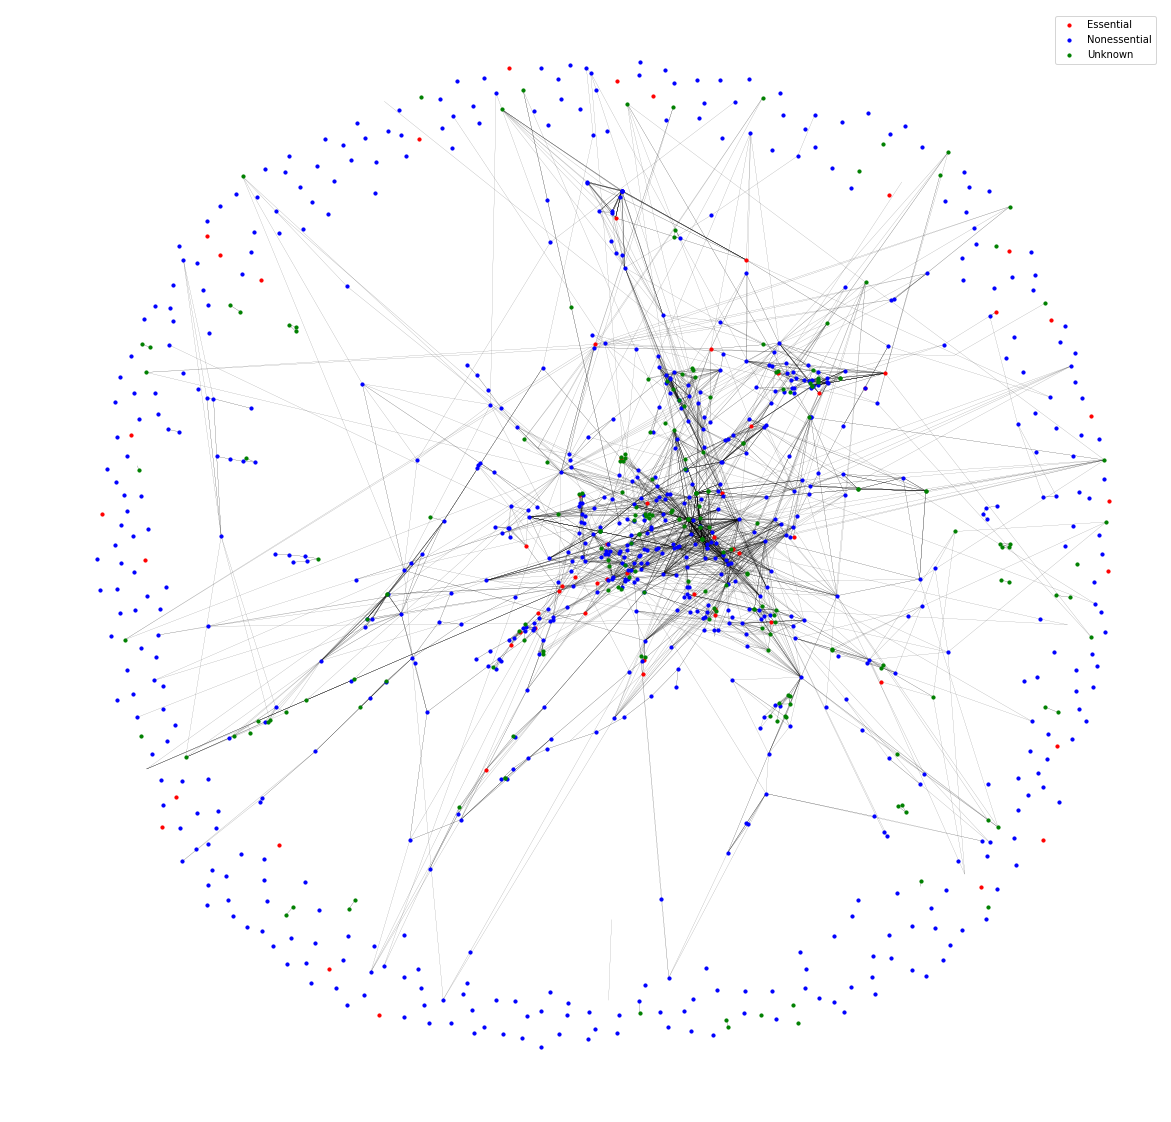

In [34]:
pos = nx.spring_layout(sce.grafo)
plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(sce.grafo, pos, nodelist=essential, node_color='r', node_size=10, alpha=1.0, label='Essential')
nx.draw_networkx_nodes(sce.grafo, pos, nodelist=nonessential, node_color='b', node_size=10, alpha=1.0, label='Nonessential')
nx.draw_networkx_nodes(sce.grafo, pos, nodelist=unknown, node_color='g', node_size=10, alpha=1.0, label='Unknown')
nx.draw_networkx_edges(sce.grafo, pos, width=0.1, alpha=1.0, arrows=False)
plt.axis('off')
plt.legend(['Essential', 'Nonessential', 'Unknown'])
plt.savefig('ScerevisiaeMN.png')
plt.show()

### Graph visualization without isolates

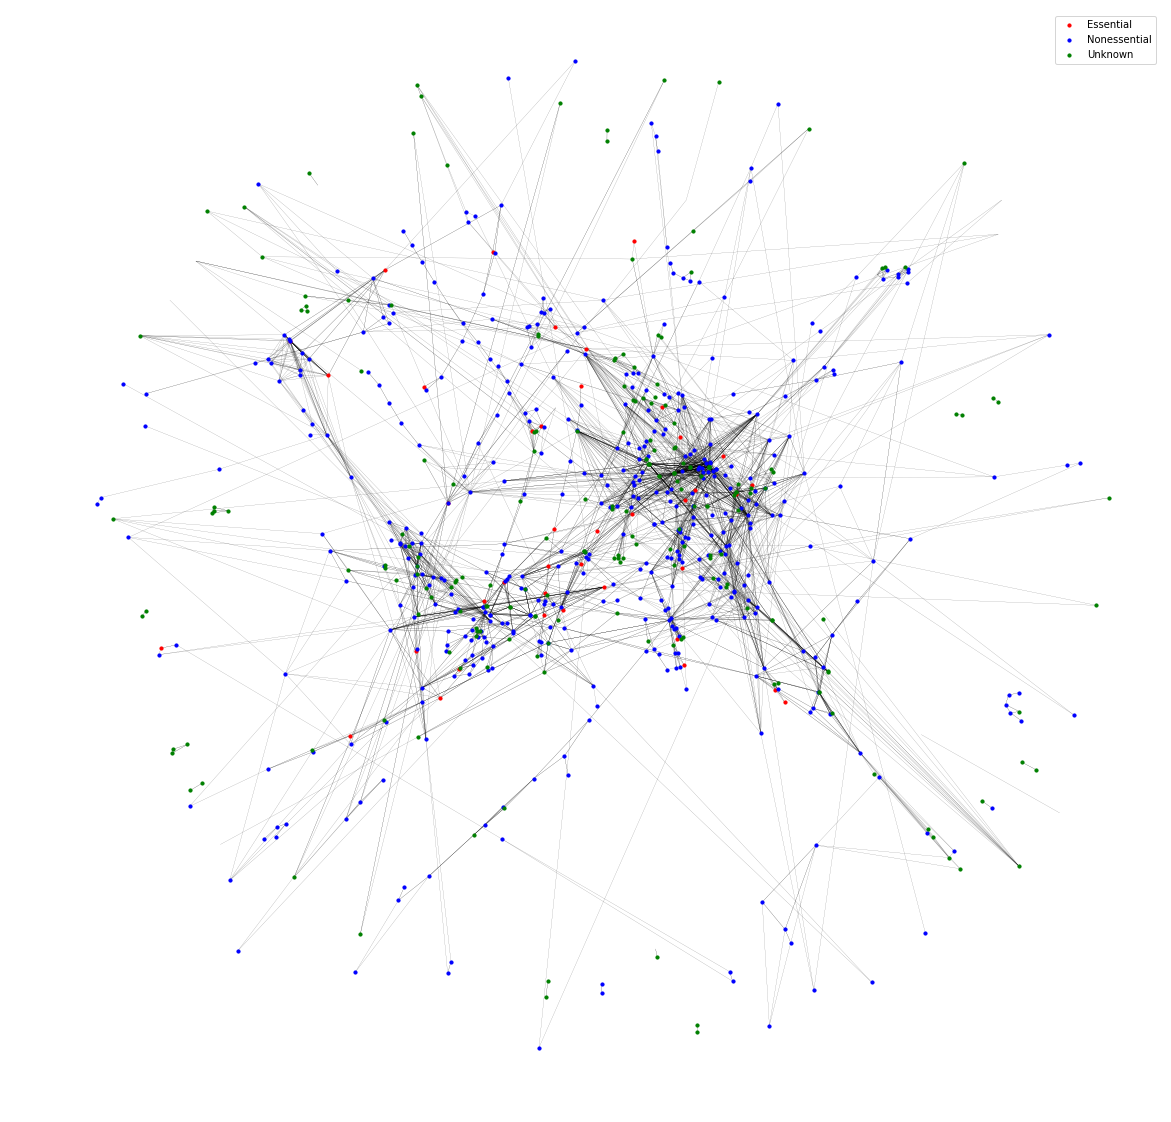

In [35]:
teste = sce.grafo.copy()
essential = [n for n in essential if n not in list(nx.isolates(teste))]
nonessential = [n for n in nonessential if n not in list(nx.isolates(teste))]
unknown = [n for n in unknown if n not in list(nx.isolates(teste))]
teste.remove_nodes_from(list(nx.isolates(teste)))

pos = nx.spring_layout(teste)
plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(teste, pos, nodelist=essential, node_color='r', node_size=10, alpha=1.0, label='Essential')
nx.draw_networkx_nodes(teste, pos, nodelist=nonessential, node_color='b', node_size=10, alpha=1.0, label='Nonessential')
nx.draw_networkx_nodes(teste, pos, nodelist=unknown, node_color='g', node_size=10, alpha=1.0, label='Unknown')
nx.draw_networkx_edges(teste, pos, width=0.1, alpha=1.0, arrows=False)
plt.axis('off')
plt.legend(['Essential', 'Nonessential', 'Unknown'])
plt.savefig('ScerevisiaeCleanedMN.png')
plt.show()

### Final node frequency

In [36]:
print('Essential nodes:', len(essential))
print('Nonessential nodes:', len(nonessential))
print('Unknown nodes:', len(unknown))
print('Total nodes:', len(essential + nonessential + unknown))

Essential nodes: 40
Nonessential nodes: 463
Unknown nodes: 211
Total nodes: 714
